In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Amazon Sales data.csv')

In [4]:
# Take a brief look on the data
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
# Get the dimensions of the dataframe
df.shape

(100, 14)

In [6]:
# row of the dataframe
df.index

RangeIndex(start=0, stop=100, step=1)

In [7]:
# Get all the column name of the dataframe
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [8]:
# Look at the basic information about the dataframe (eg. not-null, dtype etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [9]:
# Checking is there any null value in the dataframe
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [10]:
# Information of basic statistics of the dataset
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [11]:
df.describe(include='object')

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date
count,100,100,100,100,100,100,100
unique,7,76,12,2,4,100,99
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H,5/28/2010,11/17/2010
freq,36,4,13,50,30,1,2


**Observations:**

There is 100 rows in the dataset with 14 columns.

The datatype of columns include: object, int64 and float64.

There is no null values is present in the dataset and also no inconsistency found.

# **Visualization:**

### Sales-trend: Month-Wise

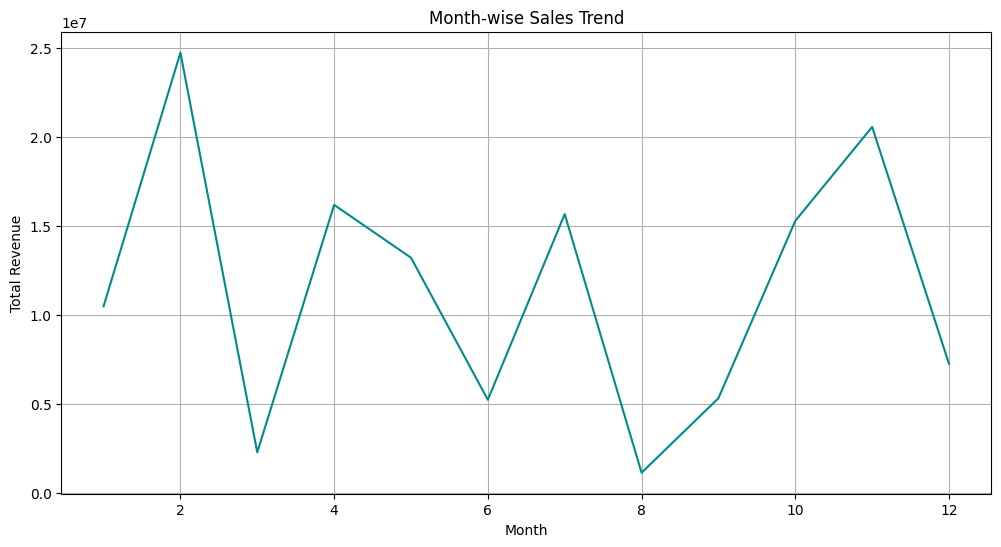

In [85]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
month_wise_sales_trend = df.groupby(df['Order Date'].dt.month)['Total Revenue'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=month_wise_sales_trend.index, y=month_wise_sales_trend.values, color='darkcyan')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

Month-wise Sales Trend Analysis
Peak Sales: February, June, October

Lowest Sales: March, May, September

Significant Changes:

Sharp increase: January to February
Sharp decline: February to March, November to December
Notable rise: May to June, September to October
Overall Trend: Highly volatile sales with significant fluctuations throughout the year.

### Sales-trend: Year-Wise

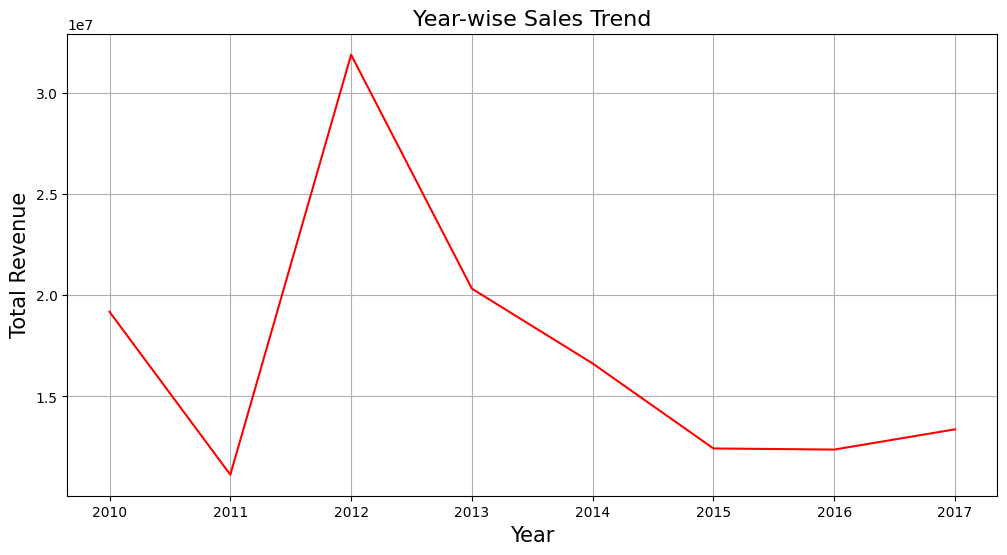

In [117]:
year_wise_sales_trend = df.groupby(df['Order Date'].dt.year)['Total Revenue'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=year_wise_sales_trend.index, y=year_wise_sales_trend.values, color='red')
plt.title('Year-wise Sales Trend',fontsize = 16)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Revenue',fontsize = 15)
plt.grid(True)
plt.show()

Year-wise Sales Trend Analysis
Peak Sales: 2012

Lowest Sales: 2011, 2016

Significant Changes:

2010-2011: Decline
2011-2012: Sharp increase
2012-2017: Overall decline with slight recovery in 2017
Trend: Peak in 2012 followed by a general decline, slight recovery in 2017.

### Sales-trend: Yearly-Month-Wise

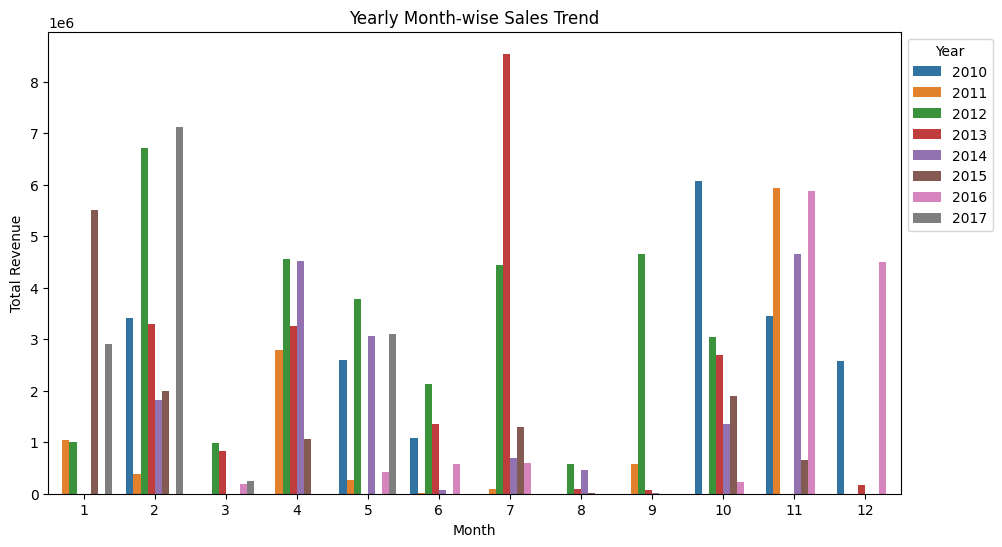

In [89]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
# group by year, month, and sum of total revenue
yearly_month_sales_trend = df.groupby(['Year','Month'])['Total Revenue'].sum().reset_index()

plt.figure(figsize=(11, 6))
sns.barplot(data = yearly_month_sales_trend, x = 'Month', y = 'Total Revenue', hue = 'Year', palette = 'tab10')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
# plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

early Month-wise Sales Trend Analysis
2010:

Peaks: October
Lows: June, August
2011:

Peaks: April, October, December
Lows: March, July, August
2012:

Peaks: February, April, July, September
Lows: March, June, August
2013:

Peaks: July
Lows: June, August, December
2014:

Peaks: April, November
Lows: June, August
2015:

Peaks: January, April, October, December
Lows: June, August
2016:

Peaks: October, November, December
Lows: March, August, September
2017:

Peaks: February, April
Lows: March, June, August
Notable Trends:
High Sales: January, February, April, July, October
Low Sales: March, May, June, August
Overall Trend:
Significant monthly and yearly variability, with some consistent high and low sales months.

## Key Matrics:

In [15]:
# Total Revenue:

total_revenue = df['Total Revenue'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 137348768.31


In [16]:
# Total Profit:

total_profit = df['Total Profit'].sum()
print(f"Total Profit: {total_profit}")

Total Profit: 44168198.39999999


In [17]:
# Unit Sold:

unit_sold = df['Units Sold'].sum()
print(f"Unit Sold: {unit_sold}")

Unit Sold: 512871


In [118]:
# Average Unit Price:
avg_unit_price = df['Unit Price'].mean()
print(f"Average Unit Price: {avg_unit_price}")

Average Unit Price: 276.7613


In [119]:
# Average Unit Cost:
avg_unit_cost = df['Unit Cost'].mean()
print(f"Average Unit Cost: {avg_unit_cost}")

Average Unit Cost: 191.048


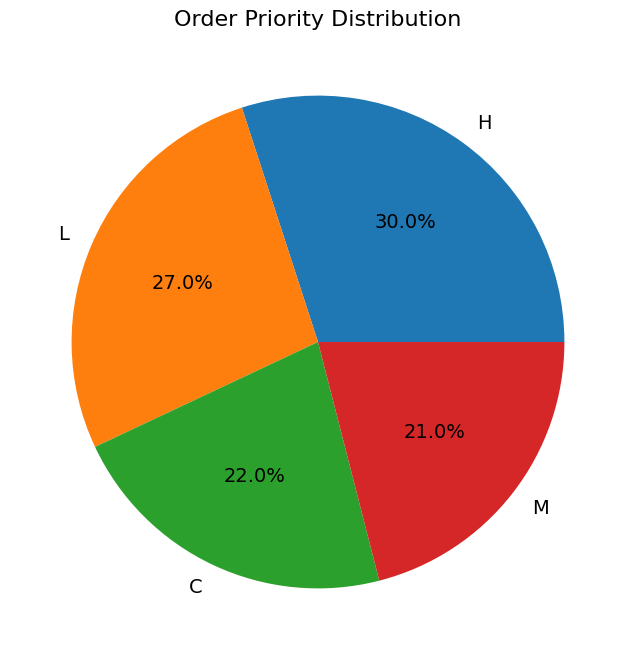

In [121]:
# Order Priority Distribution
plt.figure(figsize=(8, 8))
df['Order Priority'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('tab10'),textprops={'fontsize': 14} )
plt.title('Order Priority Distribution',fontsize = 16)
plt.ylabel('')
plt.show()

The pie chart titled “Order Priority Distribution” shows that 30.0% of orders are classified as High Priority (H), making it the largest category. Low Priority (L) orders follow closely at 27.0%. Critical © and Medium (M) priorities account for 22.0% and 21.0% of the orders, respectively. This distribution highlights that most orders are either high or low priority, with fewer orders marked as critical or medium.

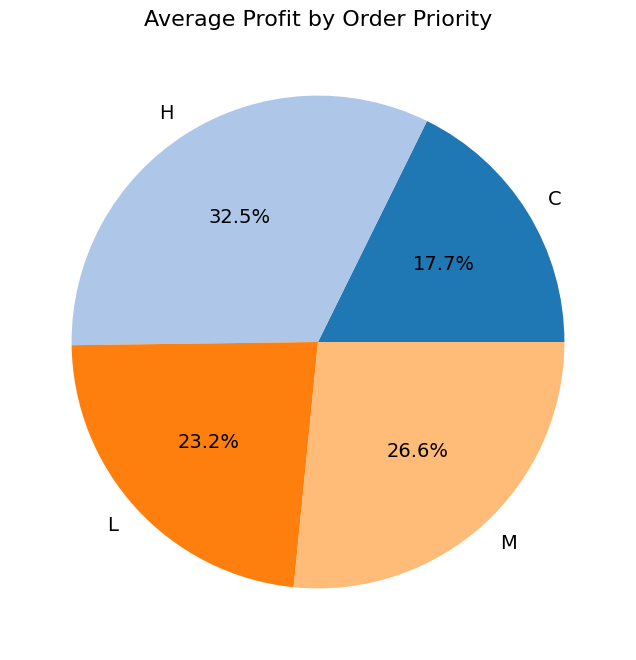

In [122]:
# Calculate average profit for each order priority
order_priority_profit = df.groupby('Order Priority')['Total Profit'].mean().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(
    order_priority_profit['Total Profit'], 
    labels=order_priority_profit['Order Priority'], 
    autopct='%1.1f%%', 
    colors=sns.color_palette('tab20'),
    textprops={'fontsize': 14}
)
plt.title('Average Profit by Order Priority', fontsize=16)
plt.show()

The pie chart titled “Average Profit by Order Priority” shows that High Priority (H) orders contribute the most to average profit at 32.5%, followed by Medium (M) at 26.6%. Low Priority (L) orders account for 23.2%, and Critical © orders contribute the least at 17.7%.

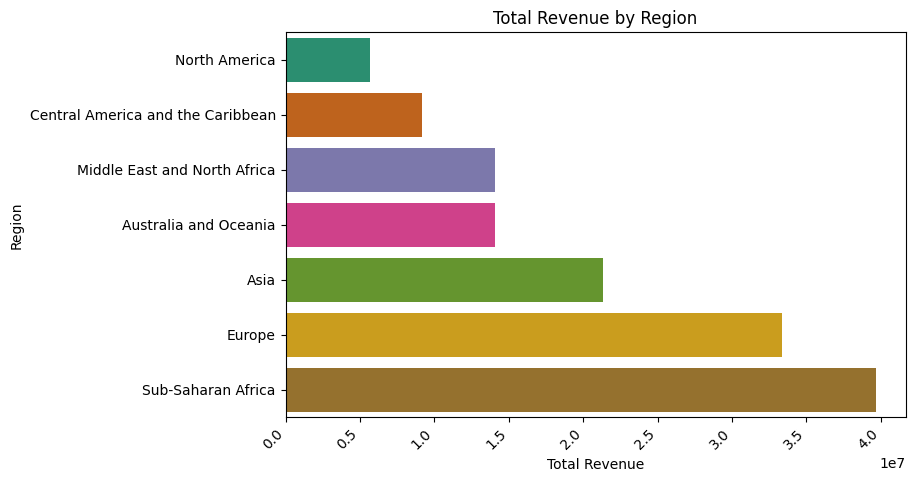

In [124]:
region_revenue = df.groupby('Region')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue')
plt.figure(figsize=(8, 5))
sns.barplot(data=region_revenue, y='Region', x='Total Revenue', hue='Region', dodge=False, palette='Dark2', legend=False)
plt.xlabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

The bar chart shows that Europe generates the highest total revenue, followed by Asia. Sub-Saharan Africa, Australia and Oceania, and Middle East and North Africa have moderate revenue levels. Central America and the Caribbean show lower revenue, while North America has the lowest revenue among the regions. This distribution highlights the varying market performances across different regions.

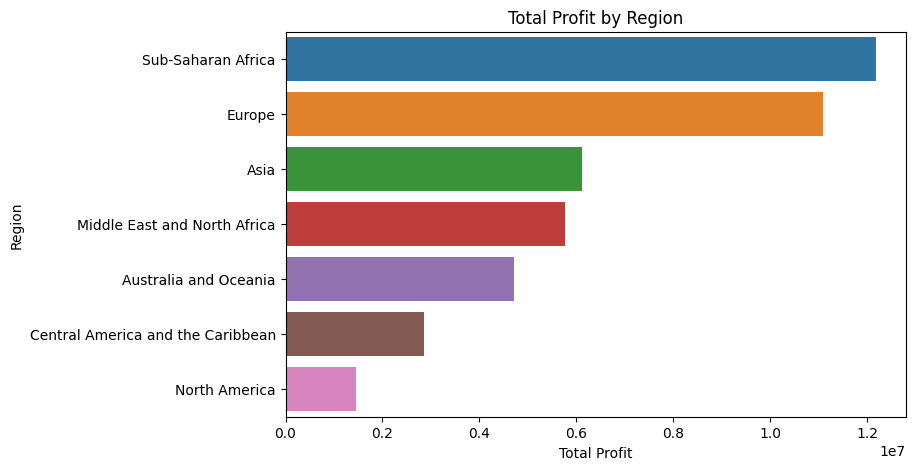

In [127]:
# Total Profit by Region

region_profit = df.groupby('Region')['Total Profit'].sum().reset_index().sort_values(by='Total Profit', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=region_profit, y='Region', x='Total Profit', hue='Region', dodge=False, palette='tab10', legend=False)
plt.xlabel('Total Profit')
plt.title('Total Profit by Region')
plt.show()

The bar chart titled “Total Profit by Region” shows that North America has the highest total profit, followed by Europe and Asia. Sub-Saharan Africa, Australia and Oceania, and Middle East and North Africa have moderate profit levels. Central America and the Caribbean show lower profit compared to other regions. This distribution highlights the varying profitability across different global regions.

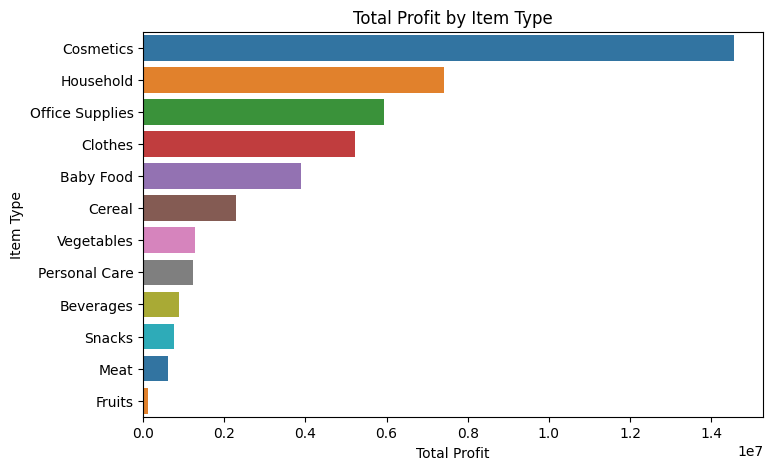

In [128]:
# Total Profit by Item Type
item_profit = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))

sns.barplot(y=item_profit.index, x = item_profit.values, palette='tab10')
plt.xlabel('Total Profit')
plt.title('Total Profit by Item Type')
plt.show()

The bar chart titled “Total Profit by Item Type” shows that Cosmetics have the highest total profit, followed by Household items and Office Supplies. Clothes and Baby Food also generate significant profits. Fruits and Meat have the lowest profits among the listed item types. This distribution highlights the varying profitability across different product categories.

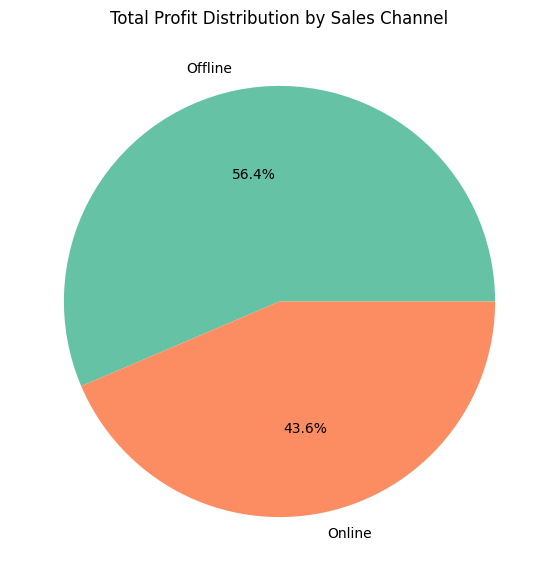

In [129]:
# Total Profit by Sales Channel
sales_chanel_total_profit = df.groupby("Sales Channel")['Total Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(7, 7)) 
sales_chanel_total_profit.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', len(sales_chanel_total_profit)))
plt.ylabel('')
plt.title('Total Profit Distribution by Sales Channel')
plt.show()

The pie chart titled “Total Profit Distribution by Sales Channel” shows that Offline sales generate 56.4% of the total profit, while Online sales contribute 43.6%. This indicates that offline sales are more profitable in this scenario.

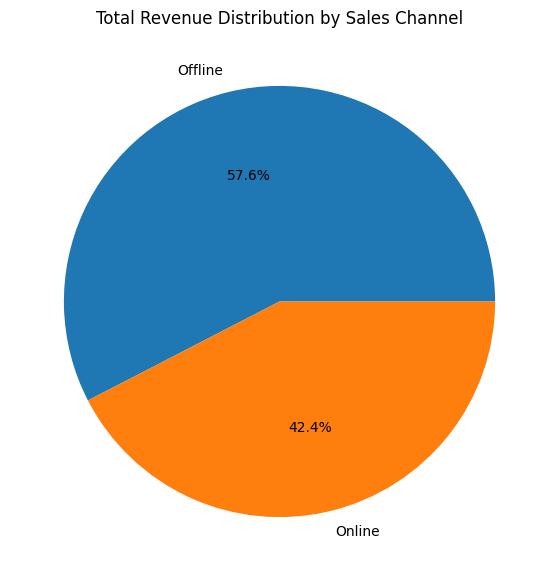

In [134]:
# Total revenue by Sales Channel
sales_chanel_total_revenue = df.groupby("Sales Channel")['Total Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(7, 7)) 
sales_chanel_total_revenue.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('tab10', len(sales_chanel_total_revenue)))
plt.ylabel('')
plt.title('Total Revenue Distribution by Sales Channel')
plt.show()

The pie chart titled “Total Revenue Distribution by Sales Channel” shows that Offline sales generate 57.6% of the total revenue, while Online sales contribute 42.4%. This indicates that offline sales are the dominant revenue source in this scenario.

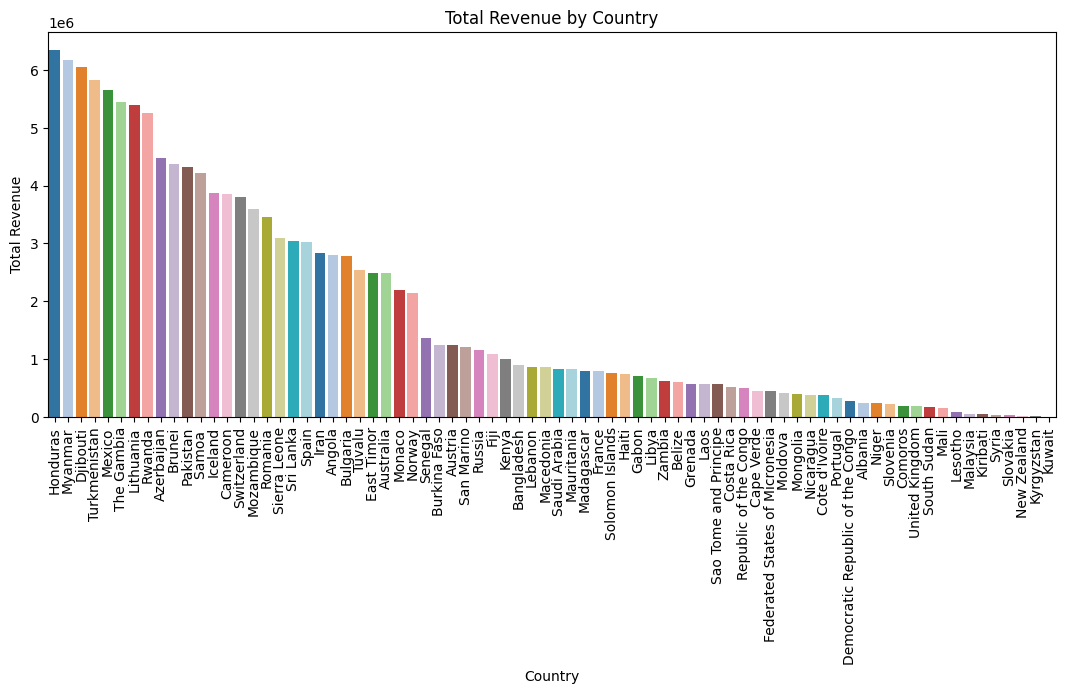

In [105]:
# Total Revenue by Country
revenue_by_country = df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize = (13,5))
sns.barplot(x=revenue_by_country.index, y=revenue_by_country.values, palette='tab20')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Country')
plt.xticks(rotation=90)
plt.show()

The bar chart titled “Total Revenue by Country” shows that Honduras has the highest revenue, while Kuwait has the lowest. The top five countries by revenue are Honduras, Myanmar, Djibouti, Turkmenistan, and Mexico. This visualization highlights the economic disparities and identifies the top revenue contributors among the countries.

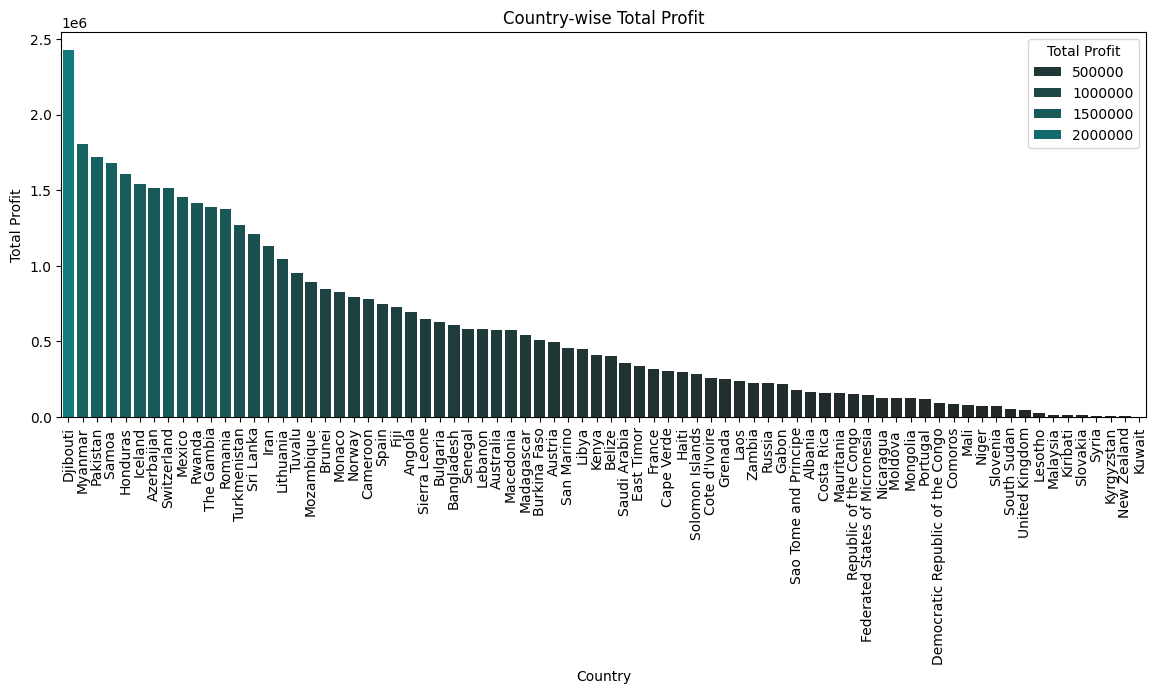

In [135]:
#Total Profit by Country
profit_by_country = df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False)
plt.figure(figsize = (14,5))
sns.barplot(data = profit_by_country.reset_index(), x='Country', y='Total Profit', hue='Total Profit',dodge= False, color='darkcyan')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.title('Country-wise Total Profit')
plt.xticks(rotation = 90)
plt.show()

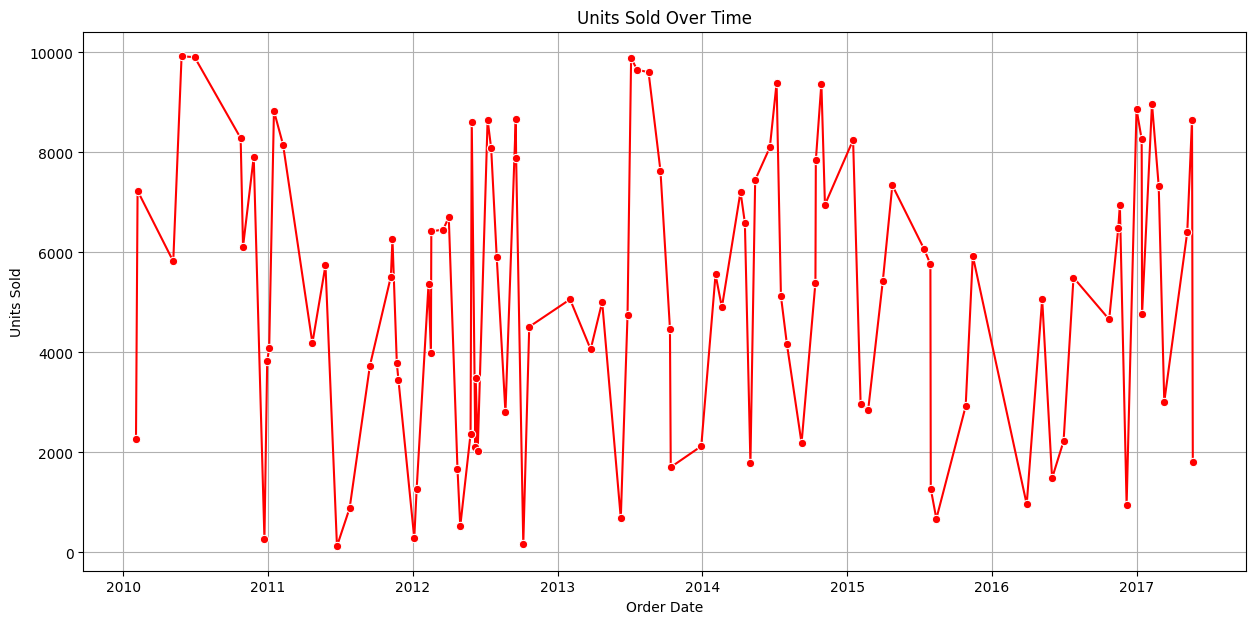

In [144]:

# How have the total units sold changed over time?

df['Order Date'] = pd.to_datetime(df['Order Date'])

units_sold_over_time = df.groupby('Order Date')['Units Sold'].sum()

plt.figure(figsize=(15, 7))
sns.lineplot(data=units_sold_over_time.reset_index(), x='Order Date', y='Units Sold',marker = 'o', color='red')
plt.xlabel('Order Date')
plt.ylabel('Units Sold')
plt.title('Units Sold Over Time')
plt.grid(True)
plt.show()

Here’s a year-wise summary of the units sold based on the plot:

2010: Significant fluctuations with several peaks nearing 10,000 units.
2011: Similar high variability with multiple peaks close to 10,000 units.
2012: Noticeable drop in peak sales, fewer instances reaching near 10,000 units.
2013: Increased volatility with some of the highest peaks surpassing previous years.
2014: Slightly less volatile but still significant fluctuations and high peaks.
2015: High variability with many sharp increases and decreases.
2016: Slight decrease in both frequency and height of peak sales.
2017: Continued fluctuations with one of the highest spikes towards mid-year.

## Relation Between Attributes

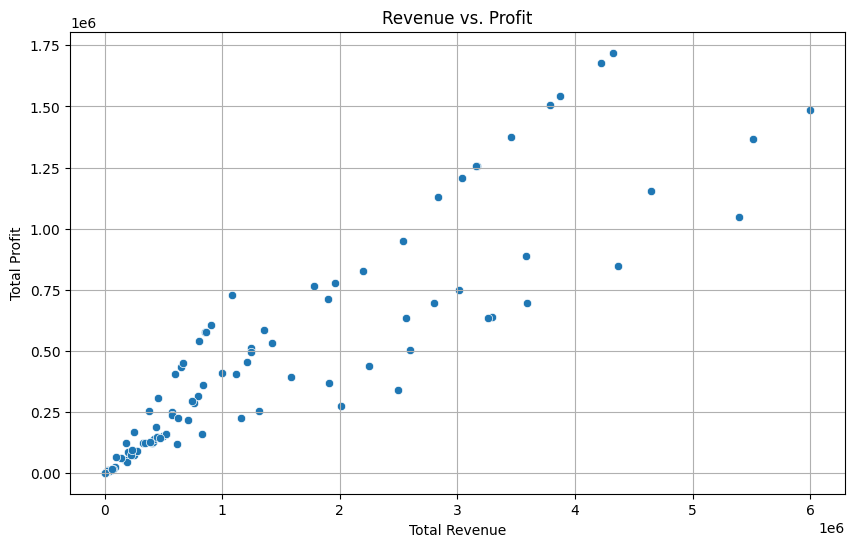

In [147]:
# Revenue vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Revenue', y='Total Profit', data=df)
plt.title('Revenue vs. Profit')
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()


This scatter plot shows a positive relationship between Total Revenue and Total Profit. As the Total Revenue increases, the Total Profit also increases, which is indicated by the upward trend of the data points.

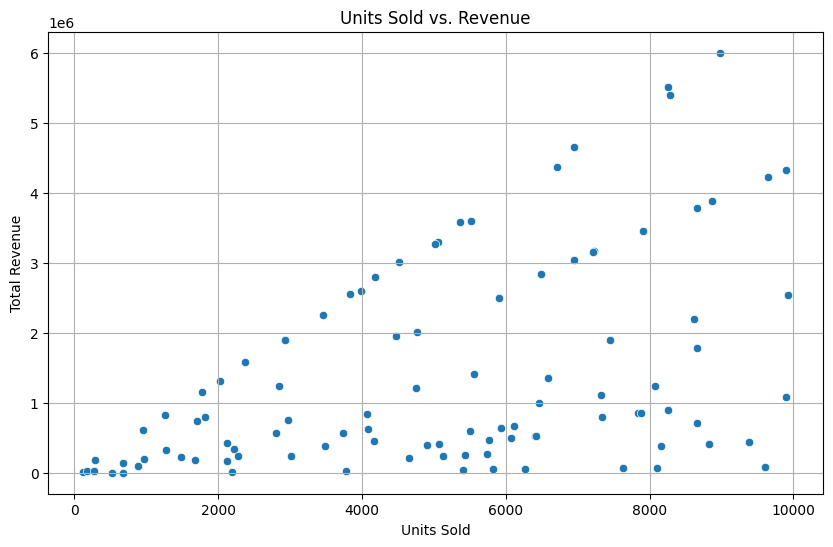

In [81]:
# Units Sold vs. Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Total Revenue', data=df)
plt.title('Units Sold vs. Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


The scatter plot shows a positive relationship between Units Sold and Total Revenue, indicating that as units sold increase, revenue generally increases. However, there are segments where increased sales do not lead to proportional revenue growth, possibly due to discounts or varying unit prices. Clusters of high sales with lower revenue suggest bulk sales at lower prices, and there are no significant outliers deviating from the overall trend.

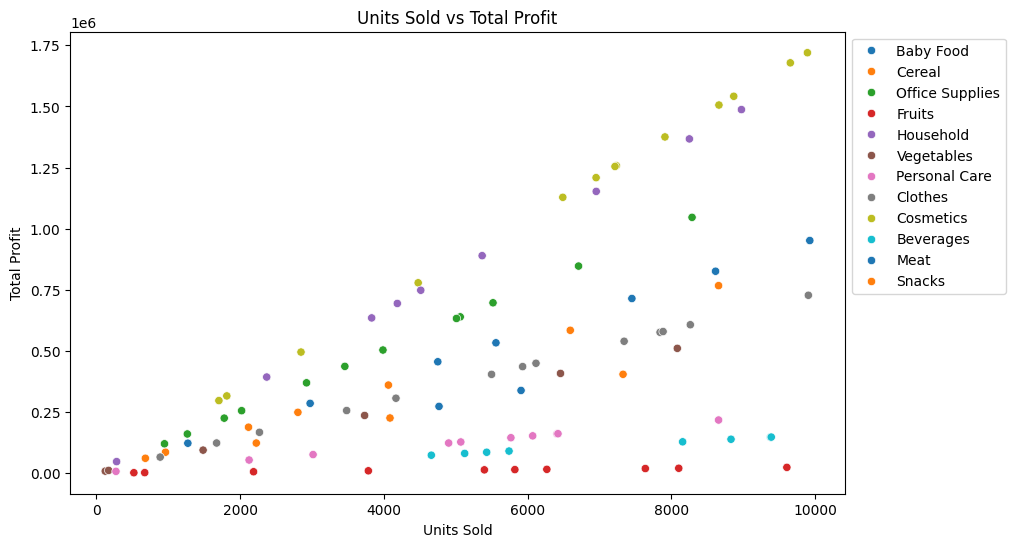

In [82]:
# Unit Sold vs Total Profit
# Is there a relationship between units sold and total profit?
# This helps identify any correlation between units sold and total profit.

plt.figure(figsize = (10,6))
sns.scatterplot(data=df, x='Units Sold', y='Total Profit', hue= 'Item Type', palette='tab10')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.title('Units Sold vs Total Profit')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # used to move legend outside of the chart
plt.show()


The scatter plot shows a positive correlation between units sold and total profit across various product categories. While higher sales generally lead to higher profits, some categories like ‘Clothes’ and ‘Cosmetics’ achieve high profits with fewer units sold, indicating higher profit margins. Categories such as ‘Baby Food’, ‘Cereal’, and ‘Beverages’ show wide variability in sales performance. Conversely, ‘Meat’ and ‘Snacks’ generate lower profits even at higher sales volumes. This analysis helps in understanding the profitability and sales dynamics of different product categories.

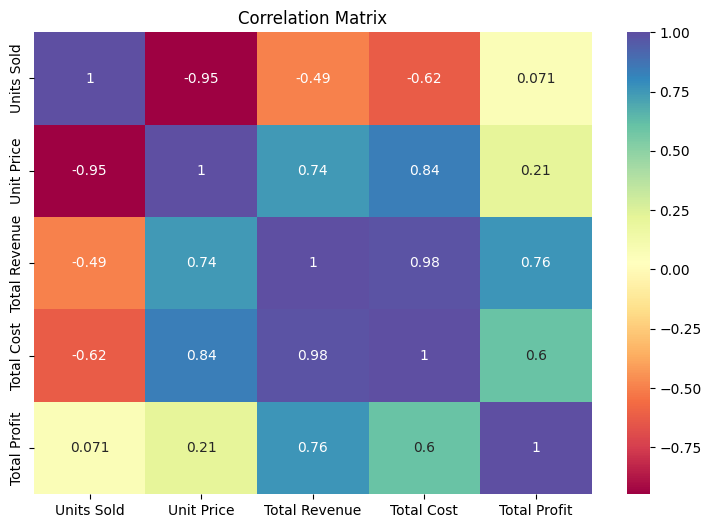

In [115]:
# Correlation Marix

# What is the correlation between different numerical features?
# This helps identify relationships between numerical variables such as units sold, unit price, total revenue, etc.

numeric_columns = ['Units Sold', 'Unit Price', 'Total Revenue', 'Total Cost', 'Total Profit']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()


The correlation matrix you provided shows the relationships between five variables: Units Sold, Unit Price, Total Revenue, Total Cost, and Total Profit. Here are the key findings:

Units Sold and Unit Price: There is a strong negative correlation (-0.95), indicating that as the number of units sold increases, the unit price tends to decrease.
Total Revenue and Total Cost: These variables have a very strong positive correlation (0.98), suggesting that as total revenue increases, total cost also increases proportionally.
Total Revenue and Total Profit: There is a strong positive correlation (0.76), indicating that higher total revenue generally leads to higher total profit.
Units Sold and Total Profit: There is a moderate positive correlation (0.75), meaning that an increase in units sold is associated with an increase in total profit.
Unit Price and Total Profit: There is a moderate negative correlation (-0.75), suggesting that higher unit prices are associated with lower total profits, possibly due to lower sales volumes at higher prices.